In [1]:
!pip install xmltodict

In [24]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import xmltodict
import json

base_url = "https://ergast.com/api/f1/"

year_race = 2023
round_race = 1

In [25]:
def return_data_response(url:str):
  response = requests.get(url)
  if response.status_code == 200:
    data_dict = xmltodict.parse(response.content)
    return data_dict
  else:
    print("Request failed with status code:", response.status_code)

# Get number of laps done during the race

In [53]:
endpoint = f'{year_race}/{round_race}/results'
url = base_url + endpoint
data_dict = return_data_response(url)

driver_results = data_dict["MRData"]["RaceTable"]["Race"]["ResultsList"]["Result"]
for driver in driver_results:
  if driver['@position'] == '1':
    number_of_laps = driver["Laps"]

# Get pandas dataframe of all lap times

In [54]:
all_laps_df = pd.DataFrame()
for lap_number in range(1, int(number_of_laps) + 1):
  endpoint = f'{year_race}/{round_race}/laps/{lap_number}'
  url = base_url + endpoint
  data_dict = return_data_response(url)

  timing_data = data_dict["MRData"]["RaceTable"]["Race"]["LapsList"]["Lap"]["Timing"]
  one_lap_df = pd.DataFrame(timing_data)
  all_laps_df = pd.concat([all_laps_df, one_lap_df], axis=0)

In [57]:
print(all_laps_df.head(20))

          @driverId @lap @position    @time
0    max_verstappen    1         1   99.019
1           leclerc    1         2  100.230
2             perez    1         3  101.063
3             sainz    1         4  101.659
4          hamilton    1         5  102.288
5           russell    1         6  102.662
6            alonso    1         7  103.608
7            bottas    1         8  104.154
8            stroll    1         9  104.670
9            norris    1        10  105.364
10             ocon    1        11  105.967
11            albon    1        12  106.453
12         sargeant    1        13  106.855
13       hulkenberg    1        14  107.339
14          tsunoda    1        15  107.791
15          piastri    1        16  108.214
16             zhou    1        17  108.467
17  kevin_magnussen    1        18  109.330
18            gasly    1        19  109.649
19         de_vries    1        20  109.959


In [56]:
# Convert lap times to seconds for plotting
all_laps_df['@time'] = pd.to_datetime(all_laps_df['@time'], format='%M:%S.%f').dt.minute * 60 + \
                       pd.to_datetime(all_laps_df['@time'], format='%M:%S.%f').dt.second + \
                       pd.to_datetime(all_laps_df['@time'], format='%M:%S.%f').dt.microsecond / 1000000

In [60]:
def plot_single_driver(full_df, driver_name:str, color_plot:str, label_driver:str):
  driver_df_mask = full_df['@driverId'] == driver_name
  driver_df = pd.DataFrame()
  driver_df = full_df[driver_df_mask]
  plt.plot(driver_df['@lap'], driver_df['@time'], marker='.', linestyle='-', color=color_plot, label=label_driver)

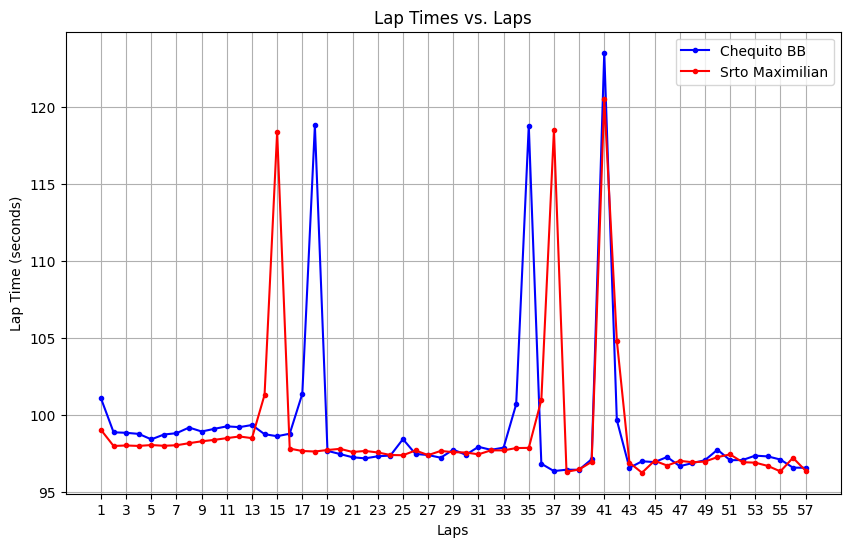

In [61]:
# Plot lap times against laps
plt.figure(figsize=(10, 6))
plot_single_driver(all_laps_df, 'perez', 'b', 'Chequito BB')
plot_single_driver(all_laps_df, 'max_verstappen', 'r', 'Srto Maximilian')
plt.xlabel('Laps')
plt.ylabel('Lap Time (seconds)')
plt.title('Lap Times vs. Laps')
plt.legend()
plt.xticks(range(0, int(number_of_laps), 2))  # Display every 2nd label
plt.grid(True)
plt.show()